In [47]:
import matplotlib.pyplot as plt
import pandas as pd
import os
%matplotlib inline

def save_fig(fig_name, tight_layout=True):
    path = os.path.join('Figures', fig_name + '.png')
    print('Saving figure', fig_name)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

wavelength = pd.read_csv("binary/Wavelength.csv", header=None)
wavelength_list = []
for wl in wavelength[0]:
    name = "wl_" + str(wl)
    wavelength_list.append(name)
df = pd.read_csv('binary/X.csv', header=None, names=wavelength_list)
y = pd.read_csv('binary/y.csv', header=None)
df['y'] = y

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Columns: 922 entries, wl_420.852 to y
dtypes: float64(921), int64(1)
memory usage: 1.3 MB


In [49]:
df.describe()

wl_420.852  wl_421.228  wl_421.605  wl_421.98199999999997  wl_422.358  \
count  180.000000  180.000000  180.000000             180.000000  180.000000   
mean    -7.285778   26.623167  -39.141444              31.432056   19.583389   
std     28.066784   38.301483   38.125418              16.871401   19.078221   
min    -74.140000  -92.590000 -143.410000             -13.050000  -25.910000   
25%    -24.740000    2.035000  -63.590000              19.257500    6.325000   
50%     -8.725000   28.960000  -35.035000              31.315000   18.445000   
75%     11.212500   52.927500  -12.890000              44.292500   34.950000   
max     71.960000  145.480000   58.810000              72.410000   66.890000   

       wl_422.735  wl_423.111  wl_423.48800000000006  wl_423.86400000000003  \
count  180.000000  180.000000             180.000000             180.000000   
mean   -27.309889   -1.363278              16.758222              -1.462556   
std     25.123531   28.830671              24.518862              24.424941   
min    -87.240000  -72.790000             -64.190000             -79.430000   
25%    -41.460000  -20.357500               2.350000             -15.630000   
50%    -27.265000   -1.695000              16.980000               0.300000   
75%     -8.497500   19.560000              35.207500              14.840000   
max     47.220000   82.840000              79.350000              71.910000   

       wl_424.241     ...      wl_748.2339999999999  wl_748.573  \
count  180.000000     ...                180.000000  180.000000   
mean    20.104333     ...                 -0.391444    6.723667   
std     22.169355     ...                 27.783458   32.377364   
min    -44.400000     ...                -45.670000  -50.880000   
25%      5.200000     ...                -24.952500  -23.310000   
50%     19.925000     ...                 -5.640000    4.385000   
75%     33.822500     ...                 25.162500   36.692500   
max     75.150000     ...                 48.820000   66.170000   

       wl_748.9110000000001   wl_749.25  wl_749.5889999999999  wl_749.928  \
count            180.000000  180.000000            180.000000  180.000000   
mean             -10.397389    6.965833            -17.164222    2.614111   
std               34.395392   35.424993             42.765649   33.565696   
min              -70.100000  -64.090000            -92.670000  -59.460000   
25%              -44.620000  -25.830000            -59.050000  -26.330000   
50%              -10.635000    5.745000            -18.400000   -2.005000   
75%               21.817500   39.475000             20.445000   32.507500   
max               57.770000   71.210000             56.550000   68.440000   

       wl_750.2669999999999  wl_750.605  wl_750.944           y  
count            180.000000  180.000000  180.000000  180.000000  
mean              -0.534778    7.659167   27.403722    0.500000  
std               30.336068   23.692330   20.522360    0.501395  
min              -55.220000  -37.350000  -12.100000    0.000000  
25%              -27.592500  -13.342500    8.255000    0.000000  
50%                0.430000    8.120000   29.080000    0.500000  
75%               26.692500   29.067500   45.830000    1.000000  
max               62.360000   47.640000   65.770000    1.000000  

[8 rows x 922 columns]

In [50]:
corr_matrix = df.corr()
corr_matrix["y"].sort_values(ascending=False)

y                       1.000000
wl_640.534              0.996882
wl_640.888              0.996760
wl_653.93               0.996681
wl_668.312              0.996675
wl_638.7669999999999    0.996674
wl_649.707              0.996612
wl_657.796              0.996604
wl_644.771              0.996576
wl_637.352              0.996551
wl_654.633              0.996550
wl_646.535              0.996542
wl_645.477              0.996515
wl_653.227              0.996507
wl_665.1610000000001    0.996495
wl_630.9780000000001    0.996490
wl_643.36               0.996465
wl_655.688              0.996462
wl_638.413              0.996443
wl_635.229              0.996422
wl_634.521              0.996411
wl_643.7130000000001    0.996399
wl_633.813              0.996375
wl_658.1469999999999    0.996373
wl_650.059              0.996369
wl_649.002              0.996368
wl_657.445              0.996355
wl_651.115              0.996354
wl_652.1709999999999    0.996336
wl_666.9119999999999    0.996335
          

Saving figure binary_corr


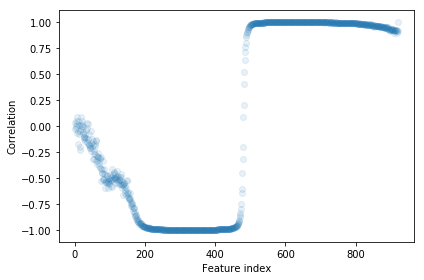

In [51]:
index = [i for i in range(len(corr_matrix))]
plt.scatter(index, corr_matrix["y"], alpha=0.1)
plt.xlabel("Feature index")
plt.ylabel("Correlation")
save_fig("binary_corr")
plt.show()

In [52]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["y"]):
    train_set = df.loc[train_index]
    test_set = df.loc[test_index]
print(train_set["y"].value_counts() / len(train_set))
print(test_set["y"].value_counts() / len(test_set))

1    0.5
0    0.5
Name: y, dtype: float64
1    0.5
0    0.5
Name: y, dtype: float64


In [53]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

def select_features(train_set, feature_names, n_features):
    # use logistic regression as an estimator
    model = LogisticRegression()
    rfe = RFE(model, n_features)
    fit = rfe.fit(train_set.drop("y", axis=1), train_set["y"])
    selected_features = []
    for feature, selected in zip(feature_names, fit.support_):
        if selected:
            selected_features.append(feature)
    return selected_features

In [54]:
selected_features = select_features(train_set, wavelength_list, 5)
print("Selected features: ", selected_features)
train_set = train_set[selected_features+["y"]]
train_set.head()

Selected features:  ['wl_738.383', 'wl_742.1239999999999', 'wl_746.877', 'wl_748.9110000000001', 'wl_749.5889999999999']


wl_738.383  wl_742.1239999999999  wl_746.877  wl_748.9110000000001  \
57        -0.54                -57.61      -22.86                -29.85   
101      -15.59                -68.89      -43.65                -16.74   
144      -29.82                -47.39      -47.40                -59.96   
64        25.40                 13.27       53.64                 -3.38   
104      -30.52                -31.95      -33.49                -48.41   

     wl_749.5889999999999  y  
57                 -66.76  0  
101                -49.49  0  
144                -49.42  0  
64                   7.61  1  
104                -71.49  0

Saving figure binary_matrix


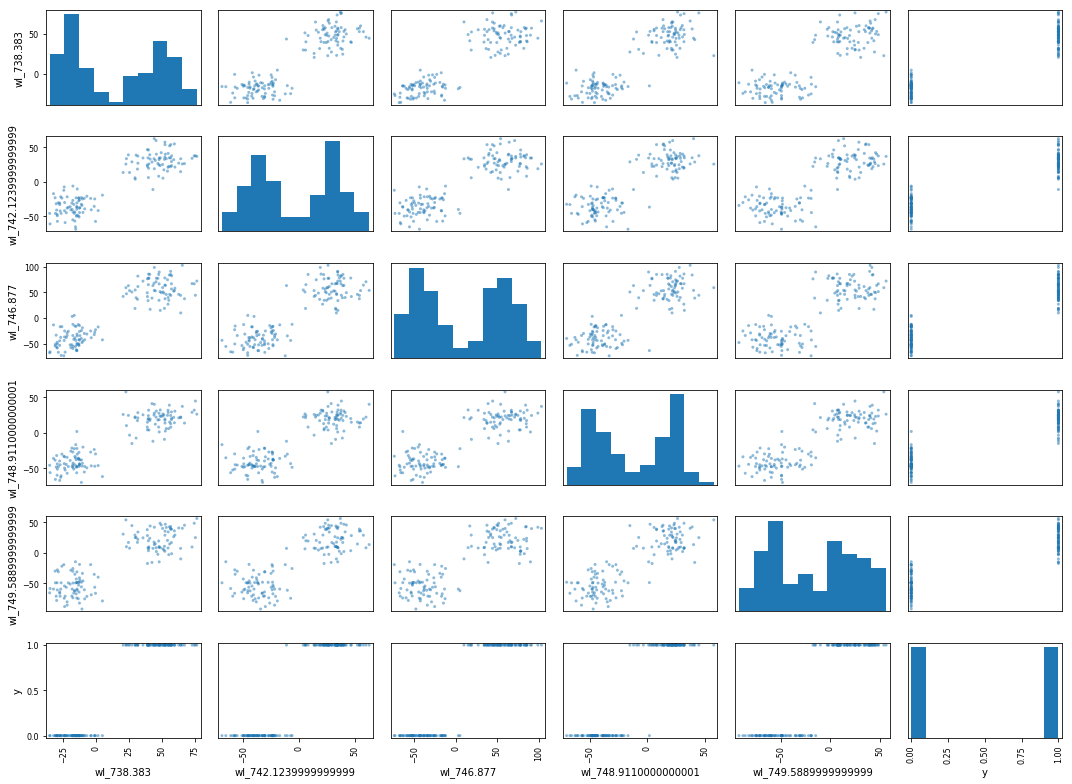

In [55]:
from pandas.plotting import scatter_matrix

scatter_matrix(train_set, figsize=(15, 11))
save_fig("binary_matrix")